In [1]:
import pathlib
import numpy as np
import pandas as pd
import umap

import plotnine as gg

from pycytominer.cyto_utils import infer_cp_features

In [2]:
%matplotlib inline

In [3]:
def process_umap(data_df, frac_sample=0.2, random_sample=True):    
    # Prepare UMAP input by removing metadata columns
    metadata_cols = infer_cp_features(data_df, metadata=True)
    
    if random_sample:
        data_df = data_df.sample(frac=frac_sample).reset_index(drop=True)
    
    metadata_df = data_df.loc[:, metadata_cols]
    umap_data_df = data_df.drop(metadata_cols, axis="columns")
    
    # Apply UMAP
    reducer = umap.UMAP(random_state=123)
    embedding = reducer.fit_transform(umap_data_df)
    
    # Setup plotting logic
    embedding_df = pd.DataFrame(embedding, columns=['x', 'y'])
    embedding_df = embedding_df.merge(metadata_df, left_index=True, right_index=True)
    
    return embedding_df

In [4]:
pd.np.random.seed(123)

/home/ubuntu/miniconda3/envs/batch-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [5]:
file_title_dict = {
    "Uncorrected": "PCA_Uncorrected_Cell_Data_All_Batches.csv.gz",
    "Plate Corrected": "Plate_Corrected_Cell_Data_All_Batches.csv.gz",
    "Plate and Well Corrected": "Well_Corrected_Cell_Data_All_Batches.csv.gz",
}

# Sample wells to distribute colors
df = pd.read_csv(file_title_dict["Uncorrected"])
shuffled_wells = df.loc[:, "Metadata_Well"].unique()
np.random.shuffle(shuffled_wells)

(639694, 55)


/home/ubuntu/miniconda3/envs/batch-env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 4 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/ubuntu/miniconda3/envs/batch-env/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/Uncorrected_umap.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


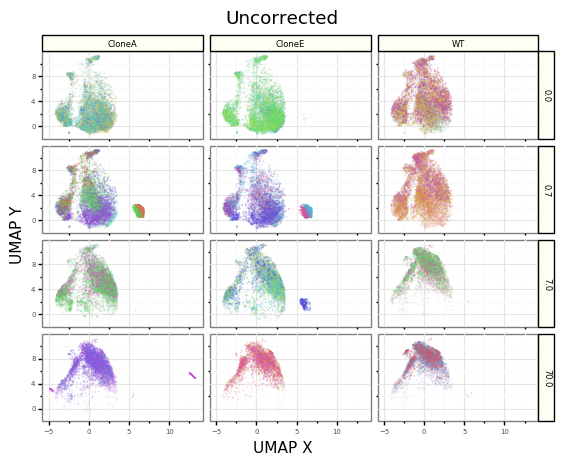

<ggplot: (8740189507377)>
(639694, 55)


/home/ubuntu/miniconda3/envs/batch-env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 4 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/ubuntu/miniconda3/envs/batch-env/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/Plate_Corrected_umap.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


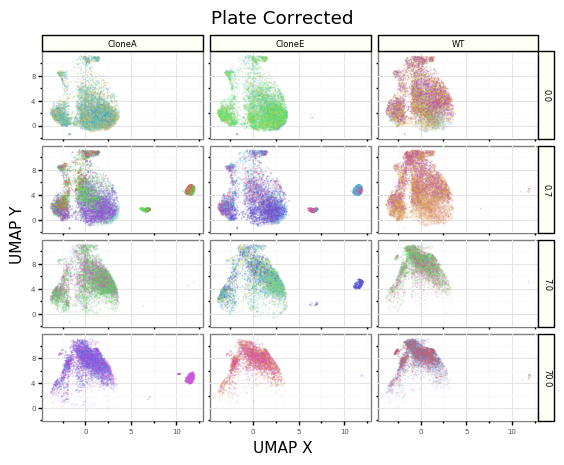

<ggplot: (8740186810009)>
(639694, 55)


/home/ubuntu/miniconda3/envs/batch-env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 4 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/ubuntu/miniconda3/envs/batch-env/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/Plate_and_Well_Corrected_umap.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


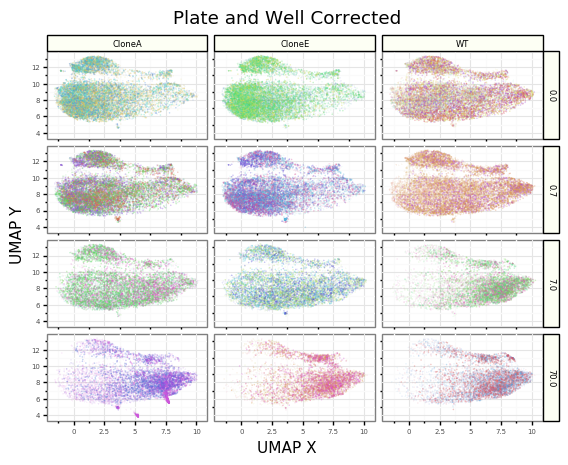

<ggplot: (8740189144585)>


In [6]:
for plot_title, input_file in file_title_dict.items():
    df = pd.read_csv(input_file)
    print(df.shape)
    umap_df = process_umap(df)

    umap_df.loc[:, "Metadata_Well"] = (
        pd.Categorical(umap_df.loc[:, "Metadata_Well"], categories=shuffled_wells)
    )
    
    umap_gg = (
        gg.ggplot(umap_df, gg.aes(x="x", y="y")) +
        gg.geom_point(gg.aes(color="Metadata_Well", shape="Metadata_Plate"),
                      stroke=0.1, alpha=0.3, size=0.4) +
        gg.facet_grid("Metadata_Dosage~Metadata_CellLine") +
        gg.theme_bw() +
        gg.scale_color_discrete(guide=False) +
        gg.scale_shape_manual(name="Plate",
                              labels={"2017106_exposure320": "2017106_exposure320",
                                      "HCT116bortezomib": "HCT116bortezomib"},
                              values=["o", "+"]) +
        gg.theme(legend_position="none",
                 axis_text=gg.element_text(size=5),
                 strip_text=gg.element_text(size=6, color="black"),
                 strip_background=gg.element_rect(colour="black", fill="#fdfff4")) +
        gg.ggtitle(plot_title) +
        gg.xlab("UMAP X") +
        gg.ylab("UMAP Y")
    )

    output_file = pathlib.Path("figures", f"{plot_title.replace(' ', '_')}_umap.png")
    umap_gg.save(output_file, height=4, width=4, dpi=400)
    print(umap_gg)